# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


##### a) linear regression
A linear regression model predicts an output as a linear combination of the inputs, with the learned weights as the coefficients for the linear combination. It assumes that the data is normally distributed around the line of best fit (the data's distance from the line of best fit can be thought of as a Gaussian measurement error). The model is trained by minimizing the residual sum of squares equation.

##### b) polynomial regression

Polynomial regression is useful when the output is a linear combination of the inputs, the inputs raised to an exponent, or a product of the inputs. The model is suited for problems that are too complicated to be captured with a linear regression, but the training process of minimizing RSS is the same (once the transformed inputs are obtained). However, the model is more prone to overfitting as the polynomial degree increases.

##### c) overfitting
Overfitting occurs when a model learns the patterns of the training set so well that it can no longer predict correct outputs for an arbitrary dataset (the validation set). Because all data points have a degree of error, fitting a model too closely to training data means its parameters are not generalized enough for the model to make predictions on data with errors it has never seen before.

##### d) underfitting
Underfitting means the model hasn't learned the patterns to the problem well enough. As a result, it performs poorly on both the training data and the validation (or new) data.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

##### a) logistic regression

A logistic regression produces a model that can perform binary classification using the sigmoid function. The training process minimizes the logistic loss function to find weights (which are linear with respect to the input parameters), that are applied to the input of the sigmoid function.

##### b) SVMs
A linear support vector machine (SVM) is a classification model that separates data points with a hyperplane.

For a data distribution that is linearly separable, there exists an infinite number of hyperplanes that could separate it; however, some are better than others. The hyperplane that would provide us with the most confidence in its classification is the one that maximizes its distance from all the data points (and in particular the data points closest to the decision boundary).

Support vectors are the data points closest to the hyperplane, and they define the decision boundary. The distances between support vectors and the hyperplane are called the margins. During training, we maximize our margins within the constraints of linear separability.

In the case where our data has noise and isn't perfectly linearly separable (there might be a bit of overlap), we introduce slack variables so our model doesn't fail. Each data point has a slack variable that measures the ratio of its distance from a marginal hyperplane to the magnitude of its hyperplane's normal vector. During training, the model now optimizes a function that includes both the distance between the margins and the sum of the slack variables (the error).

Lastly, we use kernels to transform linearly inseparable data to a new feature space where the data is linearly separable. In particular, they add new features that are functions of our other input variables to reveal similarities that make the data linearly separable

##### c) example where we need a non-linear kernel for SVMs

We can transform the graph below with the radial basis kernel.

C:\Users\Cheng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


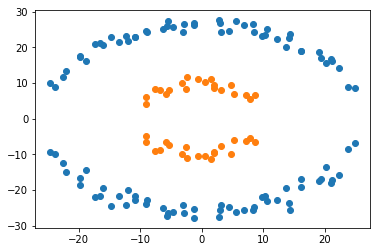

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#create group A data points
x1_temp = [(val + np.random.uniform(-2,2)) for val in range(-25,26)]
y1_temp = [(np.sqrt(np.power(26,2)-np.power(val,2))+np.random.uniform(-2,2)) for val in x1_temp]

x1 = x1_temp+x1_temp
y1 = y1_temp+[(val*(-1)+np.random.uniform(-2,2)) for val in y1_temp]

#create group B data points
x2_temp = [(val + np.random.uniform(-1,1)) for val in range(-10,11)]
y2_temp = [(np.sqrt(np.power(10,2)-np.power(val,2))+np.random.uniform(-2,2)) for val in x2_temp]

x2 = x2_temp+x2_temp
y2 = y2_temp+[(val*(-1)+np.random.uniform(-1,1)) for val in y2_temp]

plt.scatter(x1, y1)
plt.scatter(x2,y2)
plt.show()

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

##### a) supervised vs. unsupervised learning

Supervised learning trains a model using a labelled dataset. The training process involves validating a learned function against labels to achieve the best model. In contrast, unsupervised learning involves unlabelled data. During training, the model finds patterns within the feature space itself.

##### b) K-NN training and testing phases

The K-nearest neighbours algorithm operates under the assumption that members of the same class lie near eachother in the feature space.

We start by specifying a value for the hyperparameter k, the number of closest neighbours. The training phase of k-NN only involves reading in the data and its labels.

Then, during the testing phase, a new data point is added to the feature space. The model finds the distance (Euclidean, cosine similarity, etc.) between that data point and every other data point in the feature space, and takes the nearest k points as the cluster associated with the new point. In a classification problem, the new data point is given the label that appears the most out of the k points. (We can also extend this and give each point's vote a weight that is inversely proportional to its distance from the data point.)

Lastly, to determine the correct value of k, we can train and  test our model with different values of k, and observe which k seems to perform the best.

##### c) example dataset that works with SVM but not k-NN

Two roughly parallel lines are linearly separable (compatible with SVMs), but do not work with k-NN. This is because any test data point along the decision boundary would be equally close to both groups, and its classification could be incorrectly influenced by outliers that lie within the margins.
### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

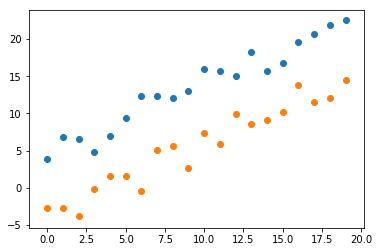

In [54]:
x = [val for val in range(20)]

#define group A data points
y1 = [(val+4+np.random.uniform(-2.5,2.5)) for val in x]

#define group B data points
y2 = [(val-4+np.random.uniform(-2.5,2.5)) for val in x]

plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show()

##### d) example dataset that works with k-NN but not SVM

k-NNs favour datasets that clearly appear in clusters/groups.

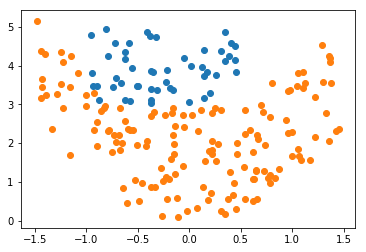

In [109]:
x1 = np.random.rand(1,50)*1.5-1
y1 = np.random.rand(1,50)*2+3

x2 = np.random.rand(1,150)*3-1.5
y2 = np.power(x2,2)+np.random.rand(1,150)*3


plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

### 4) k-NN Implementation
- Implement the "training" phase of a k-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [49]:
# Implement kNN by hand. It might be useful to store all distances in one array/list
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

## YOUR CODE HERE

# step 1: choose test data point, choose the value of k
test_instance = iris_df.iloc[0,:-2]
df_iris_data = iris_df.iloc[1:,:]

k=25

# step 2: define a function to calculate distance
def euclid_distance(data1, data2):
    return np.sqrt(np.power((data1-data2),2).sum())

# step 3: loop through all data values and calculate distance
df_iris_data['distance'] = np.nan

for x in range(len(df_iris_data)):
    dist = euclid_distance(test_instance, df_iris_data.iloc[x, 0:-2])
    df_iris_data.iloc[x, -1] = dist

# step 4: sort distances
df_sorted = df_iris_data.sort_values(by='distance').reset_index(drop=True)

# step 5: find labels of k closest neighbours
neighbours = df_sorted.loc[0:k,'target']

# step 6: determine data point's class
labels={}
for x in range(len(neighbours)):
        label = neighbours[x]
 
        if label in labels:
            labels[label] += 1
        else:
            labels[label] = 1
        
sorted_labels = sorted(labels.items())
output = sorted_labels[0][0]

print('predicted label: {}'.format(output))
print('actual label: {}'.format(iris_df.iloc[0,-1]))

C:\Users\Cheng Lin\Anaconda3\envs\env_data2\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Cheng Lin\Anaconda3\envs\env_data2\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


predicted label: 0.0
actual label: 0.0


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

##### a) bagging

Bagging involves generating multiple versions of a predictor and using the versions to get an aggregated predictor. It reduces variance from models that tend to overfit.

Specifically, bagging involves training models on a subset of the data, created through sampling with replacement. Training on subsets introduces even more variance into the datasets, and as such the aggregate predictor will be an average of models that have been trained on very different populations. Each of these models "votes" (or is averaged) to produce a final model. This results in an aggregate predictor that is generalized to all possible data distributions and is less likely to be overfitted.

##### b) boosting

Boosting is a method that also involves bootstrapping (dividing) the data into subsets, but the multiple models are trained one after the other. Each subset is trained and tested, and the data points that are the most misclassified are given heavier weights for the following training  (i.e. the misclassified data will have a larger effect on the classification for the next iteration). The reasoning is that cases with higher error are considered to be more complex and require more iterations.

Lastly, when "voting" occurs to create the aggregate model, better models are given greater weights in the weighted average.

In [121]:
from IPython.display import Image, display

print('Training phase for single, bagging, and boosting')
print('Notice how the weights of points are updated each iteration in boosting')
display(Image(url= "https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png"))

print('\nTesting/voting phase for single, bagging, boosting')
print('Notice how in boosting we take a weighted average vote')
display(Image(url='https://quantdare.com/wp-content/uploads/2016/04/bb4-800x307.png'))

Training phase for single, bagging, and boosting
Notice how the weights of points are updated each iteration in boosting



Testing/voting phase for single, bagging, boosting
Notice how in boosting we take a weighted average vote


##### c) decision tree vs random forest

A decision tree is a model that classifies using layers of if-else (binary) tests performed in a specific order, usually involving one feature at a time. Each node of a tree applies a test to one of the data point's features, and the data point traverses down the tree until it reaches a node that classifies it.

Decision trees are helpful because they are easy to interpret for visualizations, fast, and can handle categorical inputs. However, they are prone to overfitting (especially when a tree is deep) and they use a greedy approach (so they might not choose the best splits in the long run).

A random forest is an example of an ensemble model. It is a collection of decision trees whose results are aggregated into one final result. Each member of the forest is trained on different samples of the data and the aggregate model is found by voting.

Random forests are good because they prevent overfitting without increasing error due to bias. However, random forests are more like a "black box" so they're harder to interpret than a single tree.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

##### a) PCA
Principal Component Analysis is a process to project data (with m features) into a lower dimension subspace (with m' features). It assumes that the data can be meaningfully projected onto a linear subspace. We start by subtracting the mean of each feature from their respective data points, and calculating the covariance matrix of every feature. Then, we find the m' greatest eigenvalues and their eigenvectors. Lastly, we use these vectors as the W matrix and transform the data.

The number of the features in the transformed subspace, m', can be found through cross-validation.

##### b) importance of eigenvectors and eigenvalues in PCA

The eigenvectors and eigenvalues of the covariance matrix give us the directions in the feature space that maximize data variance. Once the data is projected on this subspace, the eigenvectors are the axes of the transformed feature space.

##### c) subtracting mean from covariance matrix in PCA
Subtracting the mean gives us a clean equation to compute the covariance matrix with (X_bar_trans * X_bar)

##### d) autoencoders
Autoencoders are a neural network with a "bottle neck" hidden layer that decreases the dimensionality of the dataset. During training, the autoencoder is fed the data and uses its weights to encode, and then decode, each input. The encoder learns by validating its output against the original image. Because neural networks can have non-linear transfer functions, autoencoders are able to find non-linearl subspaces to project the feature space onto, while PCAs can't.

##### e) reduced dimension of encoder eq. to PCA
The reduced dimension of an encoder would be the same as that of PCA when the transfer function of the encoder's nodes is a linear function.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [51]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


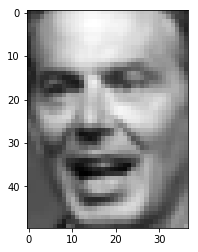

In [6]:
import matplotlib.pyplot as plt

# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

In [53]:
### insert your code here ###
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#perform PCA
#our feature space is currently 37*50 = 1850
pca = PCA(n_components=50)
pca.fit(X)

X_pca = pca.transform(X) #feature space is now 50

#train a classifier
#split data
x_train_pca = X_pca[:1030]
y_train_pca = y[:1030]

x_test_pca = X_pca[1030:]
y_test_pca = y[1030:]

#create and train the model
model_svc = SVC(gamma=0.001)
model_svc.fit(x_train_pca, y_train_pca)

#calculate accuracy
y_pred_pca = model_svc.predict(x_test_pca)
print('SVM accuracy with PCA: {}'.format(accuracy_score(y_test_pca, y_pred_pca)))

#SVM accuracy with PCA: 0.4108527131782946

SVM accuracy with PCA: 0.4108527131782946


In [12]:
import torch.nn as nn
from torch.utils.data import DataLoader

#define convolutional autoencoder
class Autoencoder(nn.Module):
    def __init__(self, m):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(m, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3))
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, m),
            nn.Tanh())
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#instantiate loader
dataloader = DataLoader(X, batch_size = 100, shuffle=True)

In [57]:
#perform autoencoding

#train autoencoder
num_epoch = 6
learning_rate = 1e-3

ae = Autoencoder(m=1850).cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(),
                             lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epoch):
    for data in dataloader:
        
        #run model
        output = ae(data)
        loss = distance(output, data)
        
        #update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epoch, loss.data))

epoch [1/6], loss:19028.0645
epoch [2/6], loss:18982.8223
epoch [3/6], loss:19918.0293
epoch [4/6], loss:19340.5547
epoch [5/6], loss:19118.4980
epoch [6/6], loss:19299.3770


In [58]:
#run SVM on autoencoded data
#encode data and split
X_ae = ae.encoder(torch.tensor(X)).detach().numpy()

x_train_ae = X_ae[:1030]
y_train_ae = y[:1030]
x_test_ae = X_ae[1030:]
y_test_ae = y[1030:]

In [60]:
#train model
#create and train the model
model_ae = SVC(gamma=0.001)
model_ae.fit(x_train_ae, y_train_ae)

#calculate accuracy
y_pred_ae = model_ae.predict(x_test_ae)
print('SVM accuracy with autoencoding: {}'.format(accuracy_score(y_test_ae, y_pred_ae)))

#SVM accuracy with autoencoding: 0.4069767441860465

SVM accuracy with autoencoding: 0.4069767441860465


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [1]:
### your code below ###

#Really sorry but too many midterms :(
